# 特征转换：降维打击

有很多方法可以增强机器学习的效果。通常认为，最主要的两个特征是准确率和预测/拟合时间。这意味着，如果利用特征工程工具后，机器学习流水线的准确率在交叉验证中有所提高，或者拟合/预测的速度加快，那就代表特征工程成功了。当然，我们的终极目标是既优化准确率又优化时间，构建出更好的流水线。

在前面的5章中，我们学习了所谓的**经典特征工程**，并讨论了特征工程的5个主要类别/步骤：

- **探索性数据分析**：在应用机器学习流水线，甚至在使用机器学习算法或特征工程工具之前，我们理应对数据集进行一些基本的描述性统计，并进行可视化操作，以便更好地理解数据的性质。
- **特征理解**：在了解了数据的大小和形状后，应该进一步仔细观察数据集的每一列（如果有可能的话）和大致特点，包括数据的等级，因为这会决定如何清洗数据。
- **特征增强**：这个阶段是关于改变数据值和列的，根据数据的等级填充缺失值，并按需执行虚拟变量转换和缩放操作
- **特征构建**：在拥有可以得到的最好数据集之后，可以考虑构建新的列，以便理解特征交互情况
- **特征选择**：在选择阶段，用所有原始和新构建的列进行（通常是单变量）统计测试，选取性能最佳的特征，以消除噪声影响、加速计算

下图总结了这个过程，并展示了其中的每个步骤：

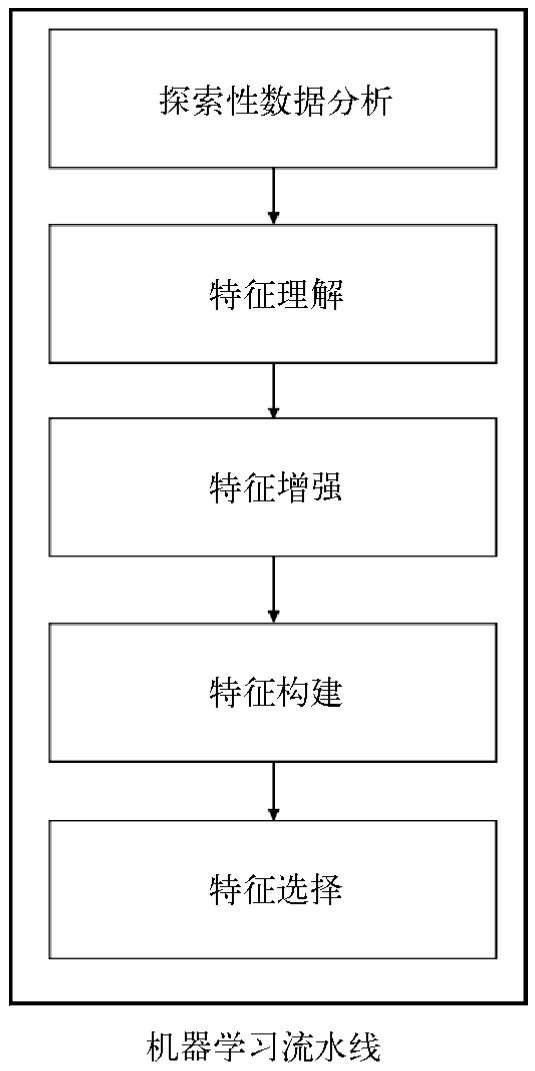

本章的内容会依赖大量的编程和数学方法，特别是线性代数。和之前一样，我们会尽力解释用到的所有代码，只在必要时对数学进行解释。

**特征转换**，这是一套改变数据内部结构的算法，以产生数学上更优的超级列（super-column）。

特征转换是一组矩阵算法，会在结构上改变数据，产生本质上全新的数据矩阵。其**基本思想**是，数据集的原始特征是数据点的描述符/特点，也应该能创造一组新的特征，用更少的列来解释数据点，并且效果不变，甚至更好。

本章内容：

- 维度缩减：特征转换、特征选择和特征构建
- 主成分分析（PCA）
- 线性判别分析（LDA）
- LDA于PCA：使用鸢（yan）尾花数据集

## 6.1 维度缩减：特征转换、特征选择与特征构建

特征转换、特征选择与特征构建都是“降维大法”，但有本质区别：

- **特征选择**仅限于从原始列中**选择特征**，而**特征转换**算法则将原始列组合起来，从而创建可以更好地描述数据的特征。特征选择的降维原理是隔离信号列和忽略噪声列。
- **特征转换**使用原始数据集的隐藏结构创建新的列，**生成全新**的数据集，结构与之前不同。这些算法创建的新特征非常强大，只需要几个就可以准确地解释整个数据集。
- **特征转换**的原理是生成可以**捕获数据本质**的新特征，这一点和特征构造的本质类似：都是创建新特征，捕捉数据的潜在结构。需要注意，这两个不同的过程方法截然不同，但是结果类似。
- **特征构造**用几个列之间的**简单操作**（加法和乘法等线性和非线性组合）构造新的列。**经典特征构造**过程构造出的任何特征都只能用原始数据集中的几个列**组合**而成，这种方法可能会导致“特征爆炸”。
- **特征转换**可以用每个列中的特性**创建超级列**，不需要创建很多新特征就可以捕获所有潜在的特征交互。因为特征转换算法涉及矩阵和线性代数，所以**不会创造出比原有列更多的列**，而且仍能提取出原始列中的结构
- **特征转换**算法可以**选择最佳**的列，将其与几个全新的列进行组合，从而构建新的特征

## 6.2 主成分分析

**主成分分析（PCA，principal components analysis）** 是将有多个相关特征的数据集投影到相关特征较少的坐标系上。这些新的、不相关的特征（之前称为超级列）叫**主成分**。主成分能替代原始特征空间的坐标系，需要的特征少、捕捉的变化多。

**PCA的目标**是识别数据集中的**模式**和**潜在结构**，以**创建新的特征**，而非使用原始特征。和特征选择类似，如果原始数据是n×d的（n是观察值数，d是原始的特征数），那么我们会将这个数据集投影到n×k（k＜d）的矩阵上。

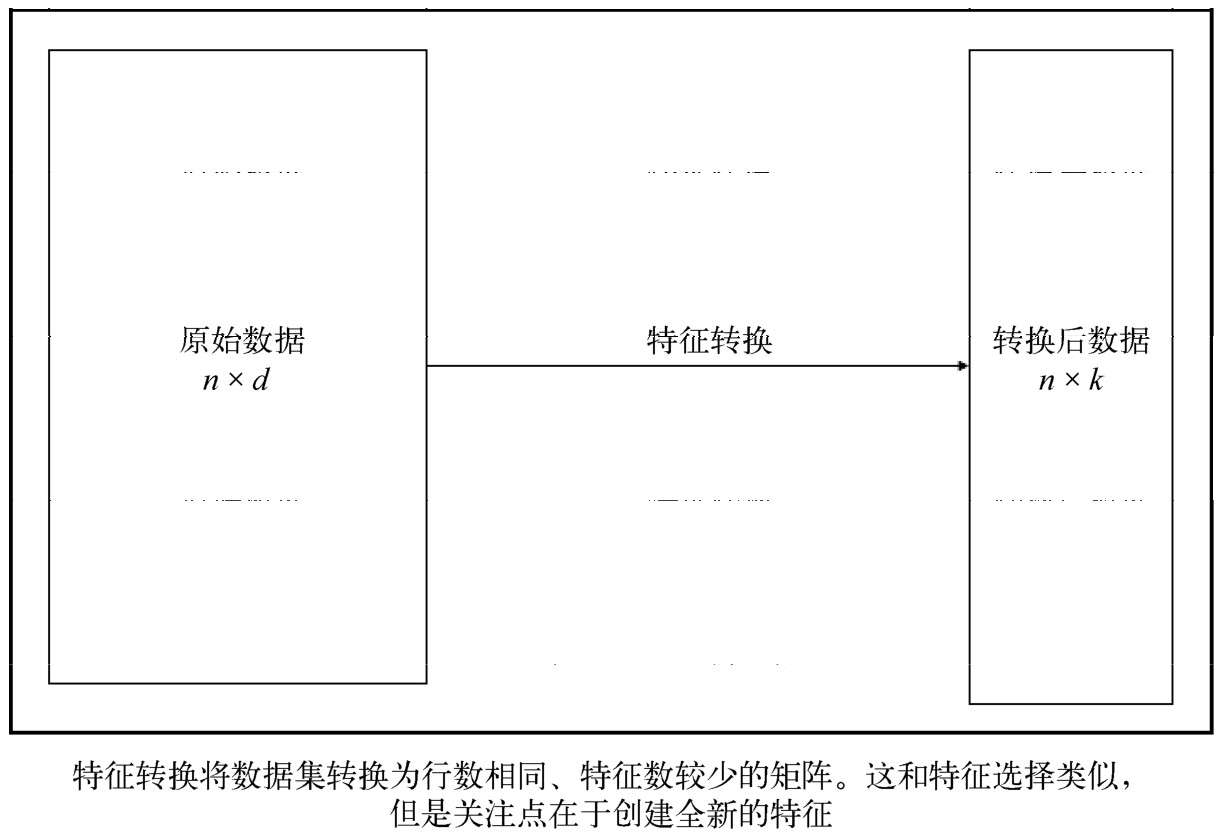

**主成分**会产生新的特征，最大化数据的方差。这样，每个特征都会解释数据的形状。主成分按可以解释的方差来排序，第一个主成分最能解释数据的方差，第二个其次。

**PCA**本身是无监督任务，即PCA不使用响应列进行投影/转换

### PCA的工作原理

PCA利用了**协方差矩阵的特征值分解**，PCA的数学原理涉及多变量微积分和线性代数，出于课程目标，我们跳过数学部分，直接应用。

基于PCA的特征转换过程分为以下4步：

1. 创建数据集的协方差矩阵
2. 计算协方差矩阵的特征值
3. 保留前k个特征值（按特征值降序排列）
4. 用保留的特征向量转换新的数据点

本章以鸢尾花数据集作为例子，一步步地查看scikit-learn的PCA效果如何。

### 鸢尾花数据集的PCA - 手工处理

鸢尾花数据集（iris）有150行和4列。每行（观察值）代表一朵花，每列（特征）代表花的4种定量特点。数据集的目标是拟合一个分类器，尝试在给定4个特征后，在3种花中预测。花的类型分别是山鸢尾（setosa）、变色鸢尾（versicolor）和维吉尼亚鸢尾（virginica）

此数据集在机器学习中非常普遍，以至于scikit-learn有一个加载该数据集的内置模块。

1. 加载模块，将数据集存储到变量iris：

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()

2. 然后将数据矩阵和响应变量存储到iris_X和iris_y中：

In [2]:
iris_X, iris_y = iris.data, iris.target

3. 先看一下要预测的花的名称：

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

4. 除了花的名称，还可以查看用于预测的特征名称：

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

5. 为了理解数据，查看一下其中的两个特征： 

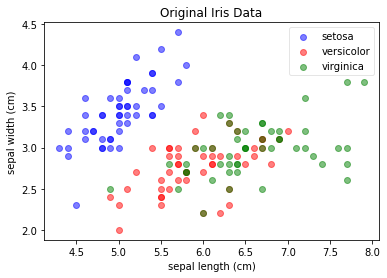

In [6]:
label_dict = {
    i: k for i, k in enumerate(iris.target_names)
}

def plot(X, y, title, x_label, y_label):
    ax = plt.subplot(111)
    for label, marker, color in zip(
        range(3),
        ('^', 's', 'o'),
        ('blue', 'red', 'green')
    ):

        plt.scatter(
            x=X[:,0].real[y == label],
            y=X[:,1].real[y == label],
            color=color,
            alpha=0.5,
            label=label_dict[label]
        )

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
        
    plt.title(title)
    plt.show()

plot(iris_X, 
     iris_y, 
     "Original Iris Data", 
     "sepal length (cm)", 
     "sepal width (cm)"
)

然后在数据集上执行PCA，获得主成分，主要步骤如下：

#### 1.创建数据集的协方差矩阵

为了计算鸢尾花数据集的协方差矩阵，先计算特征的均值向量，然后用NumPy计算协方差矩阵。协方差矩阵是d×d的方阵（特征数与行数、列数均相等），表示特征间的相互关系。它和相关系数矩阵很相似：

In [11]:
# 手动计算PCA
# 导入Numpy
import numpy as np

# 计算均值向量
mean_vector = iris_X.mean(axis=0)
print('均值向量：', mean_vector)

# 计算协方差矩阵
cov_mat = np.cov(iris_X.T)
print('协方差矩阵\n', cov_mat)

均值向量： [5.84333333 3.05733333 3.758      1.19933333]
协方差矩阵
 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


#### 2.计算协方差矩阵的特征值

NumPy有一个方便的函数，可以计算特征向量（eigenvector）和特征值（eigenvalue），以获得鸢尾花数据集的主成分：

In [12]:
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)
eig_val_cov, eig_vec_cov

(array([4.22824171, 0.24267075, 0.0782095 , 0.02383509]),
 array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
        [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
        [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
        [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]]))

In [21]:
# 按降序输出特征向量及其特征值
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i]
    print('特征向量{}:{}'.format(i + 1, eigvec_cov))
    print('特征值{}:{}'.format(i + 1, eig_val_cov[i]))
    print(60 * '-')

特征向量1:[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
特征值1:4.228241706034863
------------------------------------------------------------
特征向量2:[-0.65658877 -0.73016143  0.17337266  0.07548102]
特征值2:0.24267074792863363
------------------------------------------------------------
特征向量3:[-0.58202985  0.59791083  0.07623608  0.54583143]
特征值3:0.078209500042919
------------------------------------------------------------
特征向量4:[ 0.31548719 -0.3197231  -0.47983899  0.75365743]
特征值4:0.02383509297345033
------------------------------------------------------------


#### 3.按降序保留前k个特征值

共有4个特征值，需要选择合适的数量进行保留。如果愿意，可以保留完整的4个，但是一般希望选择的比原始特征数更少。多少合适呢？虽然可以进行暴力搜索，但我们有更好的工具 —— 碎石图（scree plot）

**碎石图**是一种简单的折线图，显示每个主成分解释数据总方差的百分比。要绘制碎石图，需要对特征值进行降序排列，绘制每个主成分和之前所有主成分方差的和。在鸢尾花数据集上，碎石图有4个点，每个点代表一个主成分。每个主成分解释了总方差的某个百分比，相加后，所有主成分应该解释了数据集中总方差的100%。

取每个特征向量（主成分）的特征值，将其除以所有特征值的和，计算每个特征向量解释方差的百分比：

In [22]:
explained_variance_ratio = eig_val_cov / eig_val_cov.sum()
explained_variance_ratio

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

可以看到，4个主成分解释的部分有很大差异。作为单个特征（列），第一个主成分可以解释方差的92%以上。太惊人了！理论上，这个超级列可以完成4个原始列的绝大部分工作。

下面对碎石图进行可视化，图中的x轴上有4个主成分，y轴是累积方差。每个数据点代表到这个主成分为止可以解释的方差百分比：

Text(0, 0.5, '% of Variance Explained <= k')

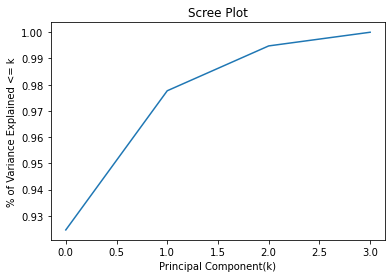

In [23]:
# 碎石图

plt.plot(np.cumsum(explained_variance_ratio))
plt.title('Scree Plot')

plt.xlabel('Principal Component(k)')
plt.ylabel('% of Variance Explained <= k')

从上图可以看出，前两个主成分就占了原始方差的近98%，意味着几乎可以只用前两个特征向量作为新的主成分。这意味着可以将数据集缩小一半（从4列缩小到2列），而且保持了特征的完整性、加速了性能。

特征值分解总是会产生和特征一样多的特征向量。这需要在计算完毕后选择希望使用的主成分数量。这表示PCA和本书中大部分算法一样是半监督的，需要一些人为输入（如要保留的特征数K）

#### 4.使用保留的特征向量转换新的数据点

在做出保留两个主成分的决定后（这个数字是靠网格搜索还是分析碎石图得到的无关紧要），必须能用这些主成分转换新的样本数据点。

首先隔离这两个特征向量，存储在top_2_eigenvectors变量中：

In [24]:
# 保存两个特征向量
top2_eigenvectors = eig_vec_cov[:,:2].T
# 转置，每行是一个主成分(向量），两行代表两个主成分
top2_eigenvectors

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102]])

通过这些向量，可以将iris_X和top_2_eigenvectors两个矩阵相乘，将数据投影到改进后的超级数据集中。如下图所示：

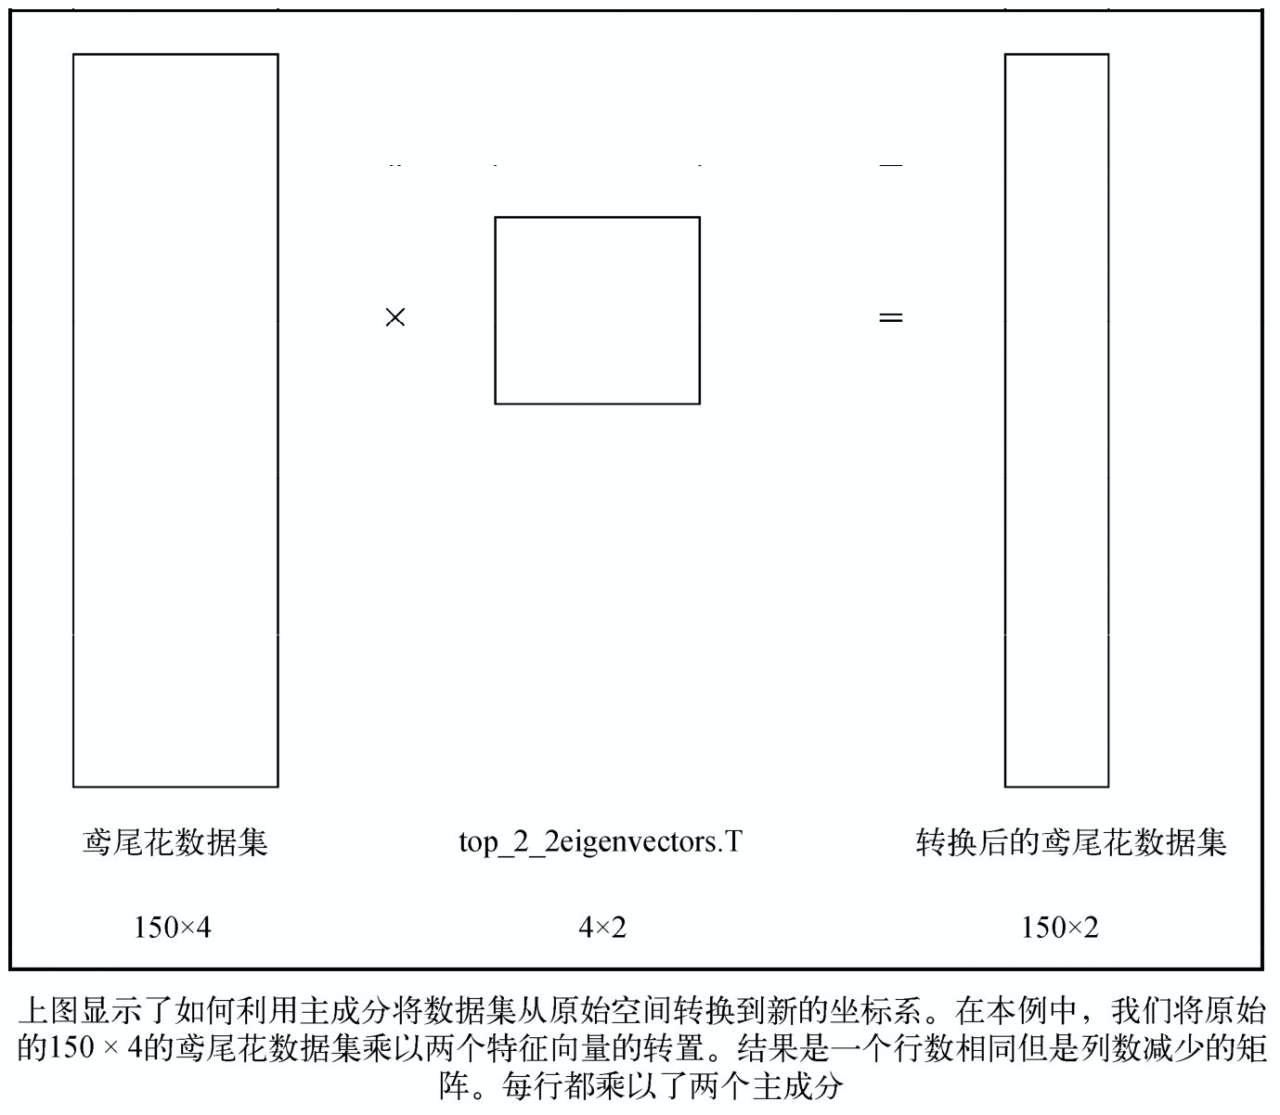

矩阵相乘后，就将原始数据集（四维）投影到新的二维空间：

In [26]:
# 将数据集从150 * 4 转换到 150 * 2

# 将数据矩阵和特征向量相乘
np.dot(iris_X, top2_eigenvectors.T)[:5,] # 输出前5行

array([[ 2.81823951, -5.64634982],
       [ 2.78822345, -5.14995135],
       [ 2.61337456, -5.18200315],
       [ 2.75702228, -5.0086536 ],
       [ 2.7736486 , -5.65370709]])

这样就完成将四维的鸢尾花数据集到只有两列的新矩阵的转换，而这个新矩阵可以在机器学习流水线中代替原始数据集。

### scikit-learn的PCA

一如既往，scikit-learn在转换器中实现了上述过程，不必自己手动编写：

In [62]:
# 导入PCA
from sklearn.decomposition import PCA
# 实例化两个主成分的PCA对象
pca = PCA(n_components=2)
# 用PCA拟合数据
pca.fit(iris_X)
# 查看PCA对象的属性，看是否和手动计算的结果匹配
pca.components_ , top2_eigenvectors

(array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
        [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]]),
 array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
        [-0.65658877, -0.73016143,  0.17337266,  0.07548102]]))

可见，sklearn的PCA拟合（计算）出的主成分几乎完美匹配之前的top2_eigenvectors变量。这里说“几乎”完美，是因为第二个主成分是之前计算值的负数。然而这在数学上而言没有问题，因为两个特征都100%有效，而且也是不相关的。

利用主成分将原始（4维）数据投影（降维）到二维空间也很方便，直接调用PCA对象的transform方法，即可将数据投影到新的二维平面上：

In [63]:
iris_2d = pca.transform(iris_X)[:5, ]
iris_2d

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [64]:
np.dot(iris_X, top2_eigenvectors.T)[:5,] # 输出前5行

array([[ 2.81823951, -5.64634982],
       [ 2.78822345, -5.14995135],
       [ 2.61337456, -5.18200315],
       [ 2.75702228, -5.0086536 ],
       [ 2.7736486 , -5.65370709]])

这里投影后的数据和之前不同，因为scikit-learn的PCA会在预测阶段自动将数据中心化，从而改变结果。验证一下：

In [65]:
# 手动中心化数据，模仿scikit-learn的PCA
np.dot(iris_X - mean_vector, top2_eigenvectors.T)[:5,]

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451]])

绘制鸢尾花数据集，比较一下投影到新坐标系之前和之后的样子：

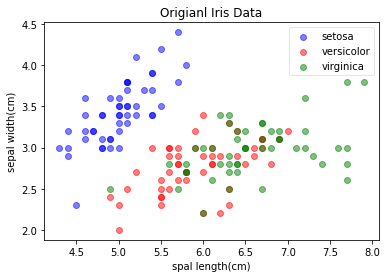

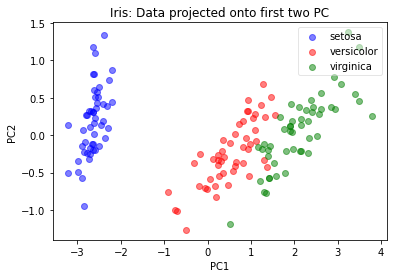

In [66]:
# 绘制原始和投影后的数据
plot(
    iris_X, 
    iris_y, 
    'Origianl Iris Data', 
    'spal length(cm)', 
    'sepal width(cm)'
)

plt.show()

plot(
    pca.transform(iris_X), 
    iris_y, 
    'Iris: Data projected onto first two PC',
    'PC1',
    'PC2'
)
plt.show()

在原始数据集中，可以在前两列的原始特征空间中看见这些鸢尾花。但是在投影后的空间内，各种花分离得更远，而且旋转了一点。数据聚类看上去更突出了。这是因为我们的主成分尽可能捕捉了数据的方差，并在图中展示。

可以像手工的例子一样，提取每个主成分解释的方差量：

In [67]:
pca.explained_variance_ratio_, explained_variance_ratio[:2]

(array([0.92461872, 0.05306648]), array([0.92461872, 0.05306648]))

现在可以用scikit-learn的PCA实现所有基本功能了，下面用这些信息展示PCA的主要优点之一：**消除相关特征**。

本质上，在**特征值分解**时，得到的所有主成分都**互相垂直（正交）**，意思是彼此**线性无关**。

因为很多机器学习模型和预处理技术会**假设输入的特征是互相独立（正交）的**，所以消除相关特征好处很大。可以用PCA确保这一点。

为了说明，首先创建鸢尾花数据集的**相关矩阵**，找出特征间的平均**线性相关参数**。然后对PCA投影后的数据集执行同样的操作，并对值进行比较。投影后数据集的平均**相关系数**应该更接近0，也就是说所有的特征都是**线性独立**的。

首先计算鸢尾花数据集的相关矩阵：

In [68]:
iris_corrcoef = np.corrcoef(iris_X.T)
iris_corrcoef

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

此矩阵是4x4的对称矩阵，每个值代表两个特征间的相关性系数。提取对角线上的相关系数，计算特征间的平均相关性：

In [69]:
iris_corrcoef[[0, 0, 0, 1, 1, 2],[1, 2, 3, 2, 3, 3]].mean()

0.29007075209349553

平均相关系数是0.29。下面做一个完整的PCA，提取所有主成分：

In [70]:
# 取所有主成分
full_pca = PCA(n_components=4)
# PCA拟合数据集
full_pca.fit(iris_X)
# 提取主成分
pca_iris = full_pca.transform(iris_X)
# 计算PCA后的平均相关系数
np.corrcoef(pca_iris.T)[[0, 0, 0, 1, 1, 2], [1, 2, 3, 2, 3, 3]].mean()

5.81783883961936e-16

可见主成分中特征的相关系数非常接近0，说明投影到主成分的数据相关性极小，有利于机器学习。

### 中心化和缩放对PCA的影响

特征的缩放对于转换往往极其重要。PCA也不例外。scikit-learn的PCA在预测阶段会将数据进行中心化（centering），但为什么不是在拟合时进行？如果scikit-learn的PCA要在预测时添加一步数据中心化的操作，那为什么不在计算特征向量时就完成？我们的假设是：将数据中心化不会影响主成分。下面进行验证：

1. 导入scikit-learn的StandardScaler模块，对鸢尾花数据集进行中心化：

In [71]:
# 导入缩放模块
from sklearn.preprocessing import StandardScaler

# 中心化数据
X_centered = StandardScaler(with_std=False).fit_transform(iris_X)
X_centered[:5,]

array([[-0.74333333,  0.44266667, -2.358     , -0.99933333],
       [-0.94333333, -0.05733333, -2.358     , -0.99933333],
       [-1.14333333,  0.14266667, -2.458     , -0.99933333],
       [-1.24333333,  0.04266667, -2.258     , -0.99933333],
       [-0.84333333,  0.54266667, -2.358     , -0.99933333]])

2. 看一下中心化后的数据集

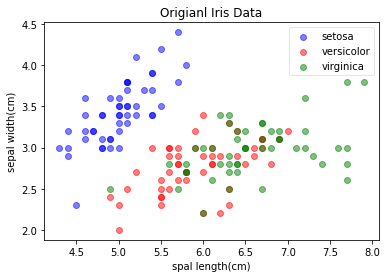

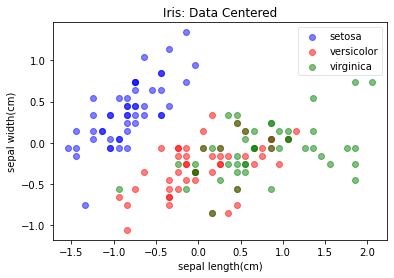

In [72]:
# 绘制原始和中心化后的数据
plot(
    iris_X, 
    iris_y, 
    'Origianl Iris Data', 
    'spal length(cm)', 
    'sepal width(cm)'
)

plot(X_centered, 
     iris_y, 
     'Iris: Data Centered', 
     'sepal length(cm)', 'sepal width(cm)'
)
plt.show()

可见，中心化只是平移和缩放了坐标轴，数据点的相对位置没有变化。

3. 用之前的PCA（n_components=2）拟合中心化后的数据集：

In [73]:
# 为了对比，先保存中心化前的主成分
pca_components = pca.components_
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [74]:
pca.components_, pca_components

(array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
        [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]]),
 array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
        [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]]))

中心化后的主成分和之前的完全相同。为了明确解释，我们用PCA类对中心化后的数据进行转换，查看前5行是否和之前的投影一样：

In [75]:
pca.transform(X_centered)[:5,], iris_2d

(array([[-2.68412563,  0.31939725],
        [-2.71414169, -0.17700123],
        [-2.88899057, -0.14494943],
        [-2.74534286, -0.31829898],
        [-2.72871654,  0.32675451]]),
 array([[-2.68412563,  0.31939725],
        [-2.71414169, -0.17700123],
        [-2.88899057, -0.14494943],
        [-2.74534286, -0.31829898],
        [-2.72871654,  0.32675451]]))

结果是一样的！投影后的中心化数据和被解释的方差比例也匹配：

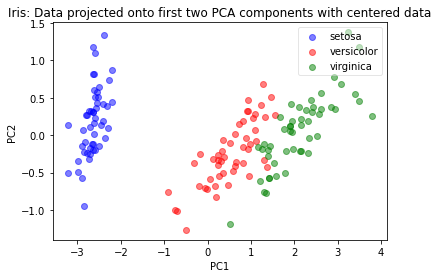

In [76]:
plot(pca.transform(X_centered), iris_y, 
     'Iris: Data projected onto first two PCA components with centered data',
     'PC1','PC2'
)

再看一下解释方差的百分比：

In [77]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

这是因为，原始矩阵和中心化后矩阵的协方差矩阵相同。如果两个矩阵的协方差矩阵相同，那么它们的特征值分解也相同。因此，scikit-learn的PCA不会对数据进行中心化，因为无论是否进行中心化操作，结果都一样。那么为什么要加上这个步骤呢？

观察一下，用标准z分数进行缩放时，主成分的变化程度：

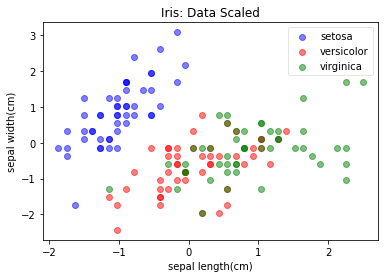

In [78]:
# Z分数缩放
X_scaled = StandardScaler().fit_transform(iris_X)
# 绘图
plot(X_scaled, iris_y, "Iris: Data Scaled", 
    "sepal length(cm)", "sepal width(cm)"
)
plt.show()

到这里，已经以不同的形式绘制了鸢尾花数据集：原始格式，中心化，以及完全缩放。在每幅图中，数据点完全相同，但是轴不一样。这是预料之中的：中心化和缩放不会改变数据的形状，但是会影响特征工程和机器学习流水线的特征交互。

在经过缩放的新数据上应用PCA，看一下主成分的变化：

In [80]:
pca.fit(X_scaled)
pca.components_, pca_components

(array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
        [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]]),
 array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
        [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]]))

和之前的主成分不同，这次连数字也不一样。PCA不改变数据的尺度，但数据的尺度会影响主成分。注意，这里缩放的意思是对数据进行中心化，并除以标准差。把数据集投影到新的主成分上，确定新的投影数据已经有了变化：

In [81]:
# 缩放不同，投影不同
pca.transform(X_scaled)[:5, ], iris_2d

(array([[-2.26470281,  0.4800266 ],
        [-2.08096115, -0.67413356],
        [-2.36422905, -0.34190802],
        [-2.29938422, -0.59739451],
        [-2.38984217,  0.64683538]]),
 array([[-2.68412563,  0.31939725],
        [-2.71414169, -0.17700123],
        [-2.88899057, -0.14494943],
        [-2.74534286, -0.31829898],
        [-2.72871654,  0.32675451]]))

最后，查看一下解释方差的百分比：

In [83]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

跟缩放前不一样了。在特征工程或机器学习中，特征缩放一般来说都是好的，在大多数情况下会推荐这种操作。但是为什么第一个主成分解释方差的比例比之前低得多？这是因为对数据进行缩放后，列与列的协方差会更加一致，而且每个主成分解释的方差会变得分散，而不是集中在一个主成分中。在实践和生产环境下，建议进行缩放，但应该在缩放和未缩放的数据上都进行性能测试。

再看看缩放后数据的投影：

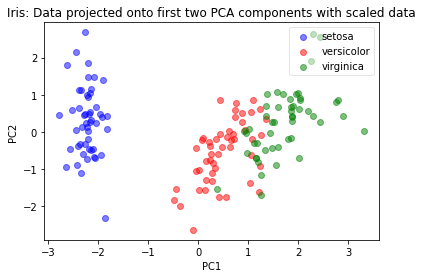

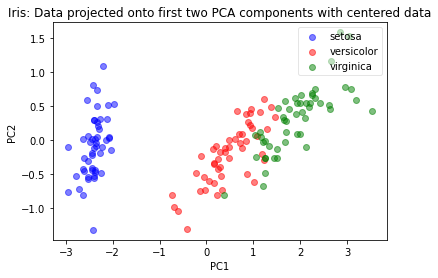

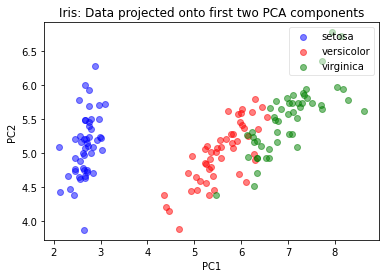

In [87]:
plot(pca.transform(X_scaled), iris_y,
    "Iris: Data projected onto first two PCA components with scaled data", 
    "PC1", "PC2"
)

plot(pca.transform(X_centered), iris_y, 
     'Iris: Data projected onto first two PCA components with centered data',
     'PC1','PC2'
)

plot(
    pca.transform(iris_X), iris_y, 
    'Iris: Data projected onto first two PCA components',
    'PC1',
    'PC2'
)
plt.show()

仔细观察并与之前投影后的原始和中心化数据进行比较，可以看见一点微妙的差异。

### 深入解释主成分（选讲）

在介绍第二个特征转换算法前，先研究一下如何解释主成分。

1. 鸢尾花数据集是一个150×4的矩阵。当我们把n_components设置为2时，得到的矩阵是2×4的：

In [88]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

2. 和手动计算特征向量时一样，components_属性可以用矩阵乘法计算投影。现将原始数据和components_矩阵的转置相乘：

In [89]:
np.dot(X_scaled, pca.components_.T)[:5, ]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

3. 为了让行列数对应，必须对矩阵进行转置。其底层的原理是，对于每行，计算原始行和每个主成分的点积。点积的结果是新的行：

In [92]:
# 提取缩放数据的第一行
row1 = X_scaled[0]

# 提取两个主成分
pc1 = pca.components_[0]
pc2 = pca.components_[1]
row1.shape, row1

((4,), array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ]))

In [94]:
np.dot(row1, pc1), np.dot(row1, pc2)

(-2.264702808807589, 0.4800265965209859)

4. 可以利用内置的转换方法进行操作：

In [97]:
pca.transform(X_scaled)[:5,]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

换句话说，每个主成分都是原始列的组合。第一个主成分是：

In [98]:
pc1

array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])

第一行（朵）缩放后的鸢尾花是：

In [99]:
row1

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

则得到的投影矩阵第一行的第一个元素为:

In [101]:
row1[0]*pc1[0] + row1[1]*pc1[1] + row1[2]*pc1[2] + row1[3]*pc1[3]

-2.264702808807589

实际上，对于任何花的数据（坐标是(a, b, c, d)：按iris.feature_names的描述，a是萼片长度，b是萼片宽度，c是花瓣长度，d是花瓣宽度），新坐标系的第一个值可以如此计算：pc1[0]x a+pc1[1]xb+ pc1[2]xc+ pc1[3]xd。

进一步处理，对主成分进行可视化。通过截断原始数据，只保留两个原始特征，即萼片长度和萼片宽度。这样做的原因是使可视化更加简单，不需要关心4个维度：

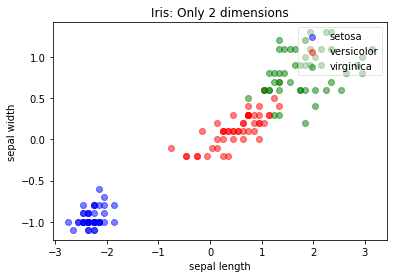

In [102]:
# 选择后两个特征
iris_2dim = iris_X[:, 2: 4]

# 中心化
iris_2dim = iris_2dim - iris_2dim.mean(axis=0)

plot(iris_2dim, iris_y, 
     'Iris: Only 2 dimensions', 
     'sepal length', 
     'sepal width'
)

可以看见左下角有一个山鸢尾（setosa）的聚类，右上方是变色鸢尾（versicolor）和维吉尼亚鸢尾（virginica）的聚类，后者所占面积更大。很明显，数据整体上按从左下角到右上角的对角线延伸。我们希望主成分会按此重新安排数据。

实例化一个保留两个主成分的PCA，然后将截断的鸢尾花数据集转换为新的列：

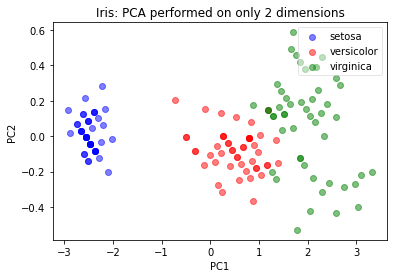

In [103]:
#实例化保留两个主成分的PCA
d2_pca = PCA(n_components=2)

# 拟合并转换截断的数据
iris_2dim_transformed = d2_pca.fit_transform(iris_2dim)

plot(iris_2dim_transformed, iris_y,
     "Iris: PCA performed on only 2 dimensions",
     "PC1", "PC2"
)

第一个主成分PC1表示了大部分差异，因此投影后的数据主要在x轴上分布。注意x轴的区间是-3～3，而y轴的区间是-0.4～0.6。

为了进一步说明，绘制原始和投影后的鸢尾花散点图，在两个坐标系上面覆盖d2_pca的主成分。

我们的目标是将主成分理解成引导向量，展示数据如何移动，以及这些向量如何变成垂直坐标系：

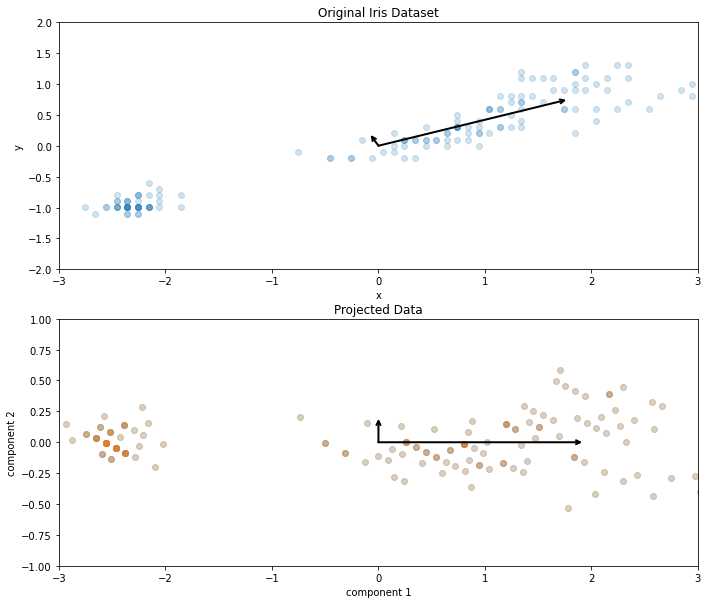

In [108]:
# 下面的代码展示原始数据和用PCA投影后的数据
# 但是在图上，每个主成分都按数据的向量处理
# 长箭头是第一个主成分，短箭头是第二个
def draw_vector(v0, v1, ax):
    arrowprops=dict(arrowstyle='->',linewidth=2,shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
# 绘图
ax[0].scatter(iris_2dim[:, 0], iris_2dim[:, 1], alpha=0.2)
        
for length, vector in zip(d2_pca.explained_variance_, d2_pca.components_):
    v = vector * np.sqrt(length)   # 拉长向量，和explained_variance对应
    draw_vector(d2_pca.mean_,d2_pca.mean_ + v, ax=ax[0])
    ax[0].set(xlabel='x', ylabel='y', 
              title='Original Iris Dataset',
              xlim=(-3, 3), ylim=(-2, 2)
    )

    ax[1].scatter(iris_2dim_transformed[:, 0], 
                  iris_2dim_transformed[:, 1], 
                  alpha=0.2
    )
for length, vector in zip(d2_pca.explained_variance_, d2_pca.components_):
    transformed_component = d2_pca.transform([vector])[0]   # 转换到新坐标系
    v = transformed_component * np.sqrt(length)  # 拉长向量，和explained_variance对应
    draw_vector(iris_2dim_transformed.mean(axis=0),
                iris_2dim_transformed.mean(axis=0) + v, ax=ax[1])
    ax[1].set(xlabel='component 1', ylabel='component 2',
                  title='Projected Data',
                  xlim=(-3, 3), ylim=(-1, 1))

上方的图表示原始坐标系中的主成分。这些主成分不是垂直的，指向数据自然遵循的方向。可以看到，两个向量中较长的那个就是第一个主成分，其方向明显是鸢尾花数据最符合的对角线方向。

第二个主成分是方差的方向，解释一部分的数据形状，但不能全部解释。下方的图显示了鸢尾花数据如何投影到新的主成分上，而新的主成分变成了直角坐标系，也就是新的x轴和y轴。PCA是一种特征转换工具，能以原始特征的线性组合构建出全新的超级特征。我们看见，这些新的主成分表示了最大的方差，变成了数据的新坐标系。

下一个特征转换算法与其类似，也是从数据中提取特征，不过是以机器学习的方式实现的。

## 6.3 线性判别分析

**线性判别分析（LDA，linear discriminant analysis）** 是特征变换算法，也是有监督分类器。LDA一般用作分类流水线的预处理步骤。和PCA一样，LDA的目标是提取一个新的坐标系，将原始数据集投影到一个低维空间中。和PCA的主要区别在于，**LDA不会专注于数据的方差，而是优化低维空间，以获得最佳的类别可分性**。意思是，新的坐标系在为分类模型**查找决策边界**时更有用，非常适合用于构建分类流水线。

LDA极为有用的原因在于，基于类别可分性的分类有助于避免机器学习流水线的**过拟合**，也叫防止**维度诅咒**。LDA也会降低计算成本

### LDA的工作原理

LDA和PCA一样可以作为降维工具使用，但并不会计算整体数据的协方差矩阵的特征值，而是计算类内（within-class）和类间（between-class）散布矩阵的特征值和特征向量。LDA分为5个步骤：

1. 计算每个类别的均值向量 
2. 计算类内和类间的散布矩阵$S_W$和$S_B$
3. 计算$S_W^{-1}S_B$的特征值和特征向量
4. 降序排列特征值，保留前k个特征向量
5. 使用前几个特征向量将数据投影到新空间

还是用例子说明问题

#### 1. 计算每个类别的均值向量

首先计算每个类别中每列的均值向量，分别是setosa、versicolor和virginica：

In [111]:
# 每个类别的均值向量

# 将鸢尾花数据集分成3块,每块代表一种鸢尾花，计算均值
mean_vectors = []

for cl in [0, 1, 2]:
    class_mean_vector = np.mean(iris_X[iris_y==cl], axis=0)
    mean_vectors.append(class_mean_vector)
    print(label_dict[cl],'的均值向量：', class_mean_vector)

setosa 的均值向量： [5.006 3.428 1.462 0.246]
versicolor 的均值向量： [5.936 2.77  4.26  1.326]
virginica 的均值向量： [6.588 2.974 5.552 2.026]


#### 2.计算类内和类间的散布矩阵

**类内**散布矩阵的计算公式为：
$$
S_W = \sum_{i=1}^c{S_i}
$$
$S_i$的定义是：
$$
S_i = \sum_{x \in D_i}^n{(x - m_i)(x - m_i)^T}
$$
其中，$m_i$代表第$i$个类别的均值向量。

**类间**散布矩阵的计算公式为：
$$
S_B = \sum_{i=1}^c{N_i(m_i - m)(m_i - m)^T}
$$
其中，$m$是数据集的总体均值，$m_i$是每个类别的样本均值，$N_i$是每个类别的样本大小（数量）：

根据上述公式：

1. 计算鸢尾花数据集的**类内**散布矩阵：

In [112]:
# 类内散布矩阵
S_W = np.zeros((4,4))
# 对于每种鸢尾花
for cl, mv in zip([0, 1, 2], mean_vectors):
    # 计算每个类别的散布矩阵
    class_sc_mat = np.zeros((4, 4))
    # 对于每个样本
    for row in iris_X[iris_y == cl]:
        # 列向量
        row, mv = row.reshape(4,1), mv.reshape(4,1)
        # 4 x 4 矩阵
        class_sc_mat += (row - mv).dot((row-mv).T)
    # 散布矩阵的和
    S_W += class_sc_mat

S_W

array([[38.9562, 13.63  , 24.6246,  5.645 ],
       [13.63  , 16.962 ,  8.1208,  4.8084],
       [24.6246,  8.1208, 27.2226,  6.2718],
       [ 5.645 ,  4.8084,  6.2718,  6.1566]])

2. 计算鸢尾花数据集**类间**散布矩阵：

In [114]:
# 计算数据集的总体均值
overall_mean = np.mean(iris_X, axis=0).reshape(4,1)

# 计算散布矩阵
S_B = np.zeros((4, 4))

for i, mean_vec in enumerate(mean_vectors):
    # 每种花的数量
    n = iris_X[iris_y==i,:].shape[0]
    # 每种花的列向量
    mean_vec = mean_vec.reshape(4, 1)
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

S_B

array([[ 63.21213333, -19.95266667, 165.2484    ,  71.27933333],
       [-19.95266667,  11.34493333, -57.2396    , -22.93266667],
       [165.2484    , -57.2396    , 437.1028    , 186.774     ],
       [ 71.27933333, -22.93266667, 186.774     ,  80.41333333]])

#### 3.计算$S_W^{-1}S_B$的特征值和特征向量

和PCA的操作类似，需要对特定矩阵进行特征值分解。在LDA中，分解矩阵$S_W^{-1}S_B$：

In [115]:
# 计算矩阵的特征值和特征向量
eig_vals, eig_vecs = np.linalg.eig(np.dot(np.linalg.inv(S_W), S_B))

eig_vecs = eig_vecs.real
eig_vals = eig_vals.real

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:, i]
    print('特征向量{}: {}'.format(i+1, eigvec_sc))
    print('特征值{}: {}'.format(i+1, eig_vals[i]))
    print('-' * 50)

特征向量1: [ 0.20874182  0.38620369 -0.55401172 -0.7073504 ]
特征值1: 32.19192919827801
--------------------------------------------------
特征向量2: [-0.00653196 -0.58661055  0.25256154 -0.76945309]
特征值2: 0.2853910426230665
--------------------------------------------------
特征向量3: [ 0.87857822 -0.24797168 -0.21685899 -0.34580708]
特征值3: 3.5576360084416415e-15
--------------------------------------------------
特征向量4: [-0.32886116  0.42069423  0.47755283 -0.69771771]
特征值4: -3.2003197954936857e-15
--------------------------------------------------


注意第3个和第4个特征值几乎是0，这是因为**LDA的工作方式**是在**类间划分决策边界**。考虑到鸢尾花数据中只有3个类别，可能只需要2个决策边界。通常来说，用LDA拟合**n个类别**的数据集，最多只需要**n-1次切割**。

#### 4.降序排列特征值，保留前k个特征向量

和PCA一样，只保留最有用的特征向量：

In [116]:
# 保留最好的两个线性判别式
linear_discriminants = eig_vecs.T[:2]
linear_discriminants 

array([[ 0.20874182,  0.38620369, -0.55401172, -0.7073504 ],
       [-0.00653196, -0.58661055,  0.25256154, -0.76945309]])

用每个特征值除以特征值的和，可以查看每个类别（线性判别式）解释总方差的比例：

In [117]:
eig_vals / eig_vals.sum()

array([ 9.91212605e-01,  8.78739503e-03,  1.09542166e-16, -9.85401435e-17])

看起来第一个判别式做了绝大部分的工作，拥有超过99%的信息。

#### 5.使用前k个特征向量投影到新空间

现在有了所有的线性判别式，先用特征向量将鸢尾花数据集投影到新空间，然后用plot函数绘制投影数据：

In [118]:
lda_iris_projection = np.dot(iris_X, linear_discriminants.T)
lda_iris_projection[:5, ]

array([[ 1.49920971, -1.88675441],
       [ 1.2643595 , -1.59214275],
       [ 1.35525305, -1.73341462],
       [ 1.18495616, -1.62358806],
       [ 1.5169559 , -1.94476227]])

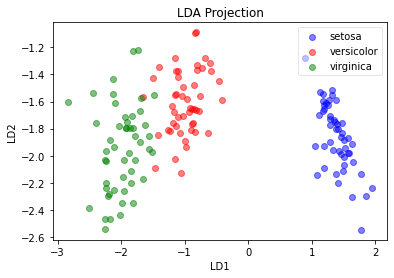

In [119]:
plot(lda_iris_projection, iris_y, "LDA Projection", "LD1", "LD2")
plt.show()

注意在图中，数据几乎完全突出出来了（甚至比PCA的投影效果还好），因为LDA会绘制决策边界，提供特征向量/线性判别式，从而帮助机器学习模型分离各种花。LDA有助于将数据投影到每个类别都尽可能分散的空间中。

### 在scikit-learn中使用LDA

scikit-learn中有LDA的实现，可以避免这个费时费力的过程。导入很简单：

In [120]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

然后可以拟合并转换原始的鸢尾花数据，绘制新的投影，以便和PCA的结果进行比较.

注意在下面的代码中，fit函数需要两个输入。这是因为：LDA其实是伪装成特征转换算法的分类器。和PCA的无监督计算（不需要响应变量）不同，LDA会尝试用响应变量查找最佳坐标系，尽可能优化类别可分性。这意味着，LDA只在响应变量存在时才可以使用（监督式）。使用时，需要把响应变量作为第二个参数输入fit，让LDA进行计算：

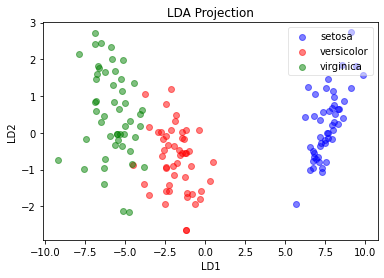

In [121]:
# 实例化LDA
lda = LinearDiscriminantAnalysis(n_components=2)
# 拟合并转换数据
X_lda_iris = lda.fit_transform(iris_X, iris_y)
# 绘制投影数据
plot(X_lda_iris, iris_y, 'LDA Projection', 'LD1', 'LD2')
plt.show()

跟PCA相比，LDA有一个scalings_属性，没有components_，但是二者的行为基本相同：

In [122]:
# 和pca.components_类似，但是转置了（4x2)
lda.scalings_

array([[ 0.82937764,  0.02410215],
       [ 1.53447307,  2.16452123],
       [-2.20121166, -0.93192121],
       [-2.81046031,  2.83918785]])

In [123]:
# 和手动计算一样
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

两个线性判别式解释的方差和之前计算的结果完全相同。这里忽略了第三个和第四个特征值，因为它们几乎是0。

然而，这些判别式乍看之下和之前手动计算的特征向量完全不同。这是因为scikit-learn计算特征向量的方式虽然得到了相同的结果，但是会进行标量缩放，如下所示：

In [124]:
for manual_component, sklearn_component in zip(eig_vecs.T[:2], lda.scalings_.T):
    print(sklearn_component / manual_component)

[3.97322221 3.97322221 3.97322221 3.97322221]
[-3.68987776 -3.68987776 -3.68987776 -3.68987776]


scikit-learn计算的线性判别式是手动计算结果的标量乘法，意味着它们都是正确的特征向量。唯一的区别在于投影数据的缩放问题。

这些特征被组织成4×2的矩阵，而不是PCA中2×4的矩阵。LDA和PCA都不改变数据尺度，所以缩放非常重要。

在LDA上拟合缩放后的鸢尾花数据，看看差异：

In [125]:
# 用LDA拟合缩放数据
X_lda_iris = lda.fit_transform(X_scaled, iris_y)
lda.scalings_

array([[ 0.68448644,  0.01989153],
       [ 0.66659193,  0.94029176],
       [-3.87282074, -1.63962597],
       [-2.13508598,  2.15691008]])

scalings_属性（和PCA的components_属性类似）显示了不同的数组，代表投影也是不一样的。为了完成对LDA的描述，再用一次之前的代码，像对待PCA的components_属性一样解释scalings_

先在截断后的数据集上用LDA拟合并转换，只保留前两个特征：

In [127]:
iris_2dim_transformed_lda = lda.fit_transform(iris_2dim, iris_y)
iris_2dim_transformed_lda[:5, ]

array([[-6.0424185 ,  0.05692487],
       [-6.0424185 ,  0.05692487],
       [-6.19685555,  0.27304711],
       [-5.88798144, -0.15919736],
       [-6.0424185 ,  0.05692487]])

scalings_矩阵现在是2×2，列是判别式（和PCA的行是主成分不同）。要进行调整，可以建立一个叫components的变量，保存scalings_的转置：

In [129]:
components = lda.scalings_.T
components

array([[ 1.54437053,  2.40239438],
       [-2.16122235,  5.04259916]])

In [130]:
np.dot(iris_2dim, components.T)[:5,]

array([[-6.0424185 ,  0.05692487],
       [-6.0424185 ,  0.05692487],
       [-6.19685555,  0.27304711],
       [-5.88798144, -0.15919736],
       [-6.0424185 ,  0.05692487]])

components变量和PCA中components_的使用方式相同。这意味着，和PCA一样，投影是原始列的一个线性组合。还要注意，LDA也会和PCA一样去除特征的相关性。为了证明这一点，计算原始截断数据和投影数据的相关矩阵：

In [131]:
# 原始特征的相关行很大
np.corrcoef(iris_2dim.T)

array([[1.        , 0.96286543],
       [0.96286543, 1.        ]])

In [133]:
# LDA的相关性极小，和PCA一样
np.corrcoef(iris_2dim_transformed_lda.T)

array([[1.00000000e+00, 8.43831908e-16],
       [8.43831908e-16, 1.00000000e+00]])

原始数据每个矩阵的右上角，特征都是高度相关的，但是LDA投影后数据的特征高度独立（相关系数接近0）。在利用PCA和LDA开始真正的机器学习前，总结一下对LDA的解释。和PCA一样，查看LDA中scalings_属性的图像：

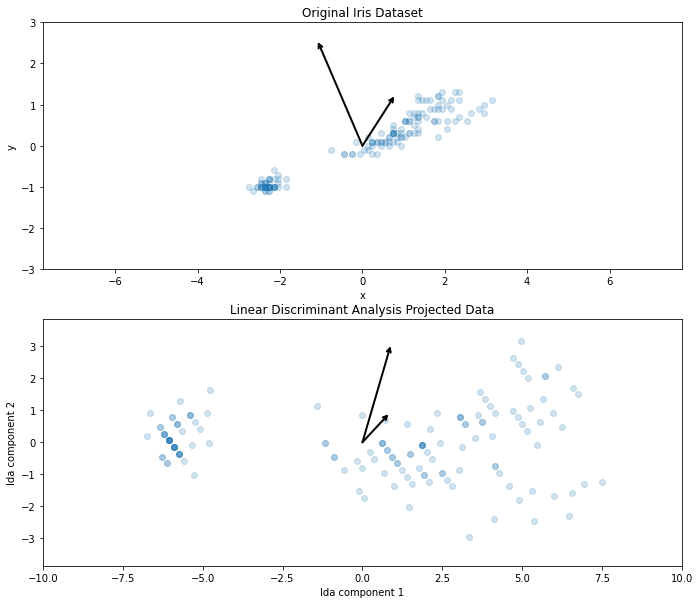

In [135]:
# 下面的代码展示原始数据和用LDA投影后的数据
# 但是在图上，每个缩放都按数据的向量处理
# 长箭头是第一个缩放向量，短箭头是第二个
        
def draw_vector(v0, v1, ax):
    arrowprops=dict(arrowstyle='->',linewidth=2,shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# 绘图
ax[0].scatter(iris_2dim[:, 0], iris_2dim[:, 1], alpha=0.2)
for length, vector in zip(lda.explained_variance_ratio_, components):
    v = vector * .5
    draw_vector(lda.xbar_, lda.xbar_ + v, ax=ax[0])   # lda.xbar_等于pca.mean_

ax[0].axis('equal')
ax[0].set(xlabel='x', ylabel='y',
          title='Original Iris Dataset',
          xlim=(-3, 3), ylim=(-3, 3)
)

ax[1].scatter(iris_2dim_transformed_lda[:, 0], 
              iris_2dim_transformed_lda[:, 1],
              alpha=0.2
)
    
for length, vector in zip(lda.explained_variance_ratio_, components):
    transformed_component = lda.transform([vector])[0]
    v = transformed_component * .1
    draw_vector(iris_2dim_transformed_lda.mean(axis=0),
                iris_2dim_transformed_lda.mean(axis=0) + v, 
                ax=ax[1])
    
ax[1].axis('equal')
ax[1].set(xlabel='lda component 1', 
          ylabel='lda component 2',
          title='Linear Discriminant Analysis Projected Data',
          xlim=(-10, 10), ylim=(-3, 3)
)

plt.show()

注意判别式并不与数据的方差一致，而是基本与之垂直：其实符合类别的分离情况。另外，它与左右两侧鸢尾花之间的间隔几乎平行。LDA在试图捕捉两个类别的分离情况。

上图中，可以看见原始数据集的scalings_向量覆盖在数据点上。较长的向量几乎与左下的山鸢尾（setosa）和右上的其他鸢尾花之间的间隔平行。这表明LDA在尝试指出原始坐标系中分离鸢尾花类别的最佳方向。

需要注意的是，LDA的scalings_属性并不像PCA的那样是1∶1对应坐标系。因为scalings_的目的不是创造新的坐标系，而是**指向可以优化类别可分性的最佳方向**。这里不会像介绍PCA时那样详细说明坐标系的计算。只需要知道，PCA和LDA的主要区别在于：**PCA是无监督方法，捕获整个数据的方差**；而**LDA是有监督方法，通过响应变量来捕获类别可分性**。

LDA等有监督特征转换的局限性在于，不能像PCA那样处理聚类任务。这是因为聚类是无监督的任务，没有LDA需要的响应变量。

## 6.4 LDA与PCA：使用鸢尾花数据集

下面用鸢尾花数据集展示LDA和PCA作为有监督和无监督机器学习特征转换预处理步骤的实用性。

从有监督的机器学习开始，建立一个分类器，从4个定量特征中识别鸢尾花的种类

In [136]:
# 导入模块
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
# 创建3个模型
single_pca = PCA(n_components=1)
single_lda = LinearDiscriminantAnalysis(n_components=1)
knn = KNeighborsClassifier(n_neighbors=3)

先不做转换，使用KNN模型取一个基线准确率，用来对比两个特征转换算法：

In [137]:
# 布进行特征转换，用KNN进行交叉验证
knn_average = cross_val_score(knn, iris_X, iris_y).mean()
knn_average

0.9666666666666668

要击败的基线准确率是96.7%。用LDA,只保留最好的线性判别式：

In [138]:
lda_pipeline = Pipeline([
    ('lda', single_lda),
    ('knn', knn)
])

lda_average = cross_val_score(lda_pipeline, iris_X, iris_y).mean()
lda_average

0.9666666666666666

看来一个线性判别式不够击败基线准确率。下面试试PCA。我们的猜测是，PCA不会优于LDA，因为PCA不会像LDA那样优化类别可分性:

In [139]:
pca_pipeline = Pipeline([
    ('pca', single_pca),
    ('knn', knn)
])

pca_average = cross_val_score(pca_pipeline, iris_X, iris_y).mean()
pca_average

0.9

毫无疑问，表现最差。 试试加一个LDA判别式怎么样：

In [140]:
# 试试两个判别式的LDA
lda_pipeline = Pipeline([
    ('lda', LinearDiscriminantAnalysis(n_components=2)),
    ('knn', knn)
])

lda_average = cross_val_score(lda_pipeline, iris_X, iris_y).mean()
lda_average

0.9733333333333334

用两个判别式就可以超过原始的准确率！不错，但是看能不能做得更好：

In [142]:
# 用特征选择工具和特征转换工具进行对比
from sklearn.feature_selection import SelectKBest
# 尝试所以的k值
for k in [1, 2, 3]:
    # 构建流水线
    select_pipeline = Pipeline([
        ('select', SelectKBest(k=k)),
        ('knn', knn)
    ])
    # 交叉验证流水线
    select_average = cross_val_score(select_pipeline, iris_X, iris_y).mean()
    print("K =", k, '最佳特征选择的准确率为：', select_average)

K = 1 最佳特征选择的准确率为： 0.9533333333333334
K = 2 最佳特征选择的准确率为： 0.9533333333333334
K = 3 最佳特征选择的准确率为： 0.9733333333333334


K=3的特征选择的准确率和两个判别式的LDA并列第一。

在生产中，联合使用**有监督**和**无监督**的特征转换是很常见的。这里设置一个GridSearch模块，找到下列参数的最佳组合：

- 缩放数据（即用或不用均值/标准差）
- PCA主成分
- LDA判别式
- KNN邻居

下列函数可以帮我们做出最佳选择：

In [143]:
def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model,              # 网格搜索的模型
                        params,             # 试验的参数
                        error_score=0.)   # 如果出错，当作结果是0
    grid.fit(X, y)              # 拟合模型和参数
    # 传统的性能指标
    print("最高准确率: {}".format(grid.best_score_))
    # 最好参数
    print("最佳参数: {}".format(grid.best_params_))
    # 平均拟合时间（秒）
    print("平均拟合时间(s):{}"
          .format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    # 平均预测时间（秒）
    # 显示模型在实时分析中的性能
    print("平均预测时间(s):{}"
          .format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

编写好接收模型和参数的函数后，可以组合使用**缩放**、**PCA**、**LDA**和**KNN**对流水线进行测试了：

In [145]:
from sklearn.model_selection import GridSearchCV
# 忽略警告
import warnings
warnings.filterwarnings("ignore")

iris_params = {
    'preprocessing__scale__with_std': [True, False],
    'preprocessing__scale__with_mean': [True, False],
    'preprocessing__pca__n_components':[1, 2, 3, 4],
     # 根据scikit-learn文档，LDA的最大n_components是类别数减1
    'preprocessing__lda__n_components':[1, 2],
    'clf__n_neighbors': range(1, 9)
}
# 更大的流水线
preprocessing = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA()),
    ('lda', LinearDiscriminantAnalysis())
])

iris_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('clf', KNeighborsClassifier())
])

get_best_model_and_accuracy(iris_pipeline, iris_params, iris_X, iris_y)

最高准确率: 0.9933333333333334
最佳参数: {'clf__n_neighbors': 8, 'preprocessing__lda__n_components': 1, 'preprocessing__pca__n_components': 3, 'preprocessing__scale__with_mean': True, 'preprocessing__scale__with_std': False}
平均拟合时间(s):0.003
平均预测时间(s):0.004


最好的准确率（99.3%）结合了缩放、PCA和LDA。在流水线中结合使用这3种算法并且用超参数进行微调是很常见的。因此，在生产环境下，最好的机器学习流水线实际上是多种特征工程工具的组合。

**总结**一下：

##### 1.PCA vs. LDA

- **PCA**和**LDA**都是**特征转换**工具，用于**找出最优的新特征**
- LDA特别为类别分离进行了优化，而PCA是无监督的，尝试用更少的特征表达方差
- 一般来说，这两个算法在流水线中会一同使用

##### 2.PCA和LDA的局限性

- 这两个工具都是**线性转换**，只能创建线性的边界，表达数值型数据
- **静态转换**，即无论输入什么，LDA和PCA的输出都是**可预期**的，而且是数学的。
- 如果数据不适合PCA或LDA（数据有非线性特征，例如是圆形的），那么无论怎么进行网格搜索，这些算法都不会有什么帮助